# STA 141B: Homework 3
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:man

Last Name: pan

Student ID: 914656278

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Fruits and Veggies

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import os
import pandas as pd

In [2]:
def data(path, type):    
    files = os.listdir(path)
    df = pd.DataFrame()
    for f in files:
        data = pd.read_excel(path + '/' + f, header = None, skiprows = [0,1,2]) # read each excel , skip the first 3 rows.
        data = data.iloc[:,:7]
        data = data.rename(columns=lambda i: ['form', 'price_per_lb', 'unit', 'yield', 'lb_per_cup', 'unit',
                                              'price_per_cup'][i])
        data = data.drop(data.columns[[2,5]], axis=1) # delete irrelevant columns
        pm = pd.ExcelFile(path + '/' + f)
        aa = pm.sheet_names # get each type's name
        data['food'] = str(aa[0])
        data['type'] = type # choose type
        data = data[data["form"].str.startswith("Fresh") == True] # find whether "Fresh" is the begining of the "form"
        
        df = df.append(data,ignore_index=True)
        a=df.iloc[:,[6,5,0,1,2,3,4]] # change the order of the columns
    return a

In [3]:
a=data("/Users/manpa/Downloads/fruit", 'Fruit')

In [4]:
a

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,Fruit,Apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,Fruit,Apricots,Fresh1,3.04007,0.93,0.363763,1.1891
2,Fruit,Bananas,Fresh1,0.566983,0.64,0.330693,0.292965
3,Fruit,Blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
4,Fruit,Blueberries,Fresh1,4.73462,0.95,0.31967,1.59318
5,Fruit,Cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938
6,Fruit,Cherries,Fresh1,3.59299,0.92,0.341717,1.33455
7,Fruit,Grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278
8,Fruit,Grapes,Fresh1,2.09383,0.96,0.330693,0.721266
9,Fruit,Honeydew melon,Fresh1,0.796656,0.46,0.374786,0.649077


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [7]:
b=data("/Users/manpa/Downloads/vegetables", 'Vegetable')

In [8]:
b

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,Vegetable,Acorn squash,Fresh1,1.17225,0.458554,0.451948,1.155360
1,Vegetable,Artichoke,Fresh1,2.21305,0.375309,0.385809,2.274967
2,Vegetable,Asparagus,Fresh1,3.21349,0.493835,0.396832,2.582272
3,Vegetable,Avocado,Fresh1,2.23587,0.740753,0.31967,0.964886
4,Vegetable,Broccoli,Fresh,,,,NaN
5,Vegetable,Brussels sprouts,Fresh1,2.76355,1.06,0.341717,0.890898
6,Vegetable,Butternut squash,Fresh1,1.24474,0.714,0.451948,0.787893
7,Vegetable,Cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944
8,Vegetable,Cabbage,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412
9,Vegetable,Carrots,Fresh,NaN,NaN,NaN,NaN


I cannot get the correct prices for tomatoes, cause the columns of the objective prices do not follow the row of "Fresh". And as for other files, if the objective prices do not follow the row of "fresh", we also cannot get the correct prices, such as broccoli,celery, and so on.

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [12]:
b2 = b.dropna() # remove rows without a price from the vegetable data
b2.index=range(0,len(b2['form']))
b2

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,Vegetable,Acorn squash,Fresh1,1.17225,0.458554,0.451948,1.155360
1,Vegetable,Artichoke,Fresh1,2.21305,0.375309,0.385809,2.274967
2,Vegetable,Asparagus,Fresh1,3.21349,0.493835,0.396832,2.582272
3,Vegetable,Avocado,Fresh1,2.23587,0.740753,0.31967,0.964886
4,Vegetable,Brussels sprouts,Fresh1,2.76355,1.06,0.341717,0.890898
5,Vegetable,Butternut squash,Fresh1,1.24474,0.714,0.451948,0.787893
6,Vegetable,Cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944
7,Vegetable,Cabbage,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412
8,Vegetable,Collard greens,Fresh1,2.63084,1.16,0.286601,0.650001
9,Vegetable,Corn,Fresh1,2.69062,0.54,0.363763,1.812497


In [13]:
ab = pd.concat([a,b2]) #combine the fruit and vegetable data frames
ab.index=range(0,len(ab['form']))
ab

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,Fruit,Apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,Fruit,Apricots,Fresh1,3.04007,0.93,0.363763,1.1891
2,Fruit,Bananas,Fresh1,0.566983,0.64,0.330693,0.292965
3,Fruit,Blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
4,Fruit,Blueberries,Fresh1,4.73462,0.95,0.31967,1.59318
5,Fruit,Cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938
6,Fruit,Cherries,Fresh1,3.59299,0.92,0.341717,1.33455
7,Fruit,Grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278
8,Fruit,Grapes,Fresh1,2.09383,0.96,0.330693,0.721266
9,Fruit,Honeydew melon,Fresh1,0.796656,0.46,0.374786,0.649077


In [17]:
import numpy as np
ab['price_per_lb']=np.float64(ab['price_per_lb'])
ab['yield']=np.float64(ab['yield'])
ab['lb_per_cup']=np.float64(ab['lb_per_cup'])
ab['price_per_cup']=np.float64(ab['price_per_cup'])

Through the method above, we can make sure all columns of numbers are numeric (not strings).

__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

In [20]:
a3=a[['food','price_per_lb']] 

In [21]:
from matplotlib import pyplot as plt

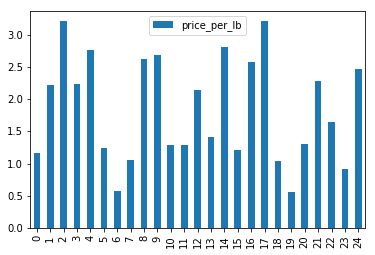

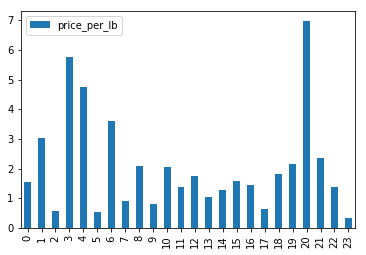

In [22]:
a3.plot(kind='bar')
plt.show()

Question 1: According to the plot, we can find that Watermelon, bananas, cantaloup, and pineapple are the least expensive . Raspberries, blackberries, and blueberries are the most expensive fruit. (per lb)

In [23]:
b3=b2[['food','price_per_lb']]  

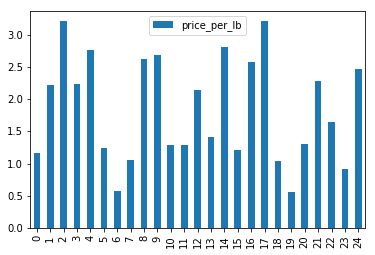

In [24]:
b3.plot(kind='bar')
plt.show()

In [36]:
a['true price'] = a['price_per_lb']/a['yield']
b2['true price'] = b2['price_per_lb']/b2['yield']
ab['true price'] = ab['price_per_lb']/ab['yield']

C:\Users\manpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
a

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup,true price
0,Fruit,Apples,Fresh1,1.56752,0.9,0.242508,0.422373,1.74168
1,Fruit,Apricots,Fresh1,3.04007,0.93,0.363763,1.1891,3.26889
2,Fruit,Bananas,Fresh1,0.566983,0.64,0.330693,0.292965,0.885912
3,Fruit,Blackberries,Fresh1,5.77471,0.96,0.31967,1.92292,6.01532
4,Fruit,Blueberries,Fresh1,4.73462,0.95,0.31967,1.59318,4.98381
5,Fruit,Cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938,1.05073
6,Fruit,Cherries,Fresh1,3.59299,0.92,0.341717,1.33455,3.90542
7,Fruit,Grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278,1.83225
8,Fruit,Grapes,Fresh1,2.09383,0.96,0.330693,0.721266,2.18107
9,Fruit,Honeydew melon,Fresh1,0.796656,0.46,0.374786,0.649077,1.73186


In [27]:
b2

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup,true price
0,Vegetable,Acorn squash,Fresh1,1.17225,0.458554,0.451948,1.155360,2.5564
1,Vegetable,Artichoke,Fresh1,2.21305,0.375309,0.385809,2.274967,5.89661
2,Vegetable,Asparagus,Fresh1,3.21349,0.493835,0.396832,2.582272,6.50722
3,Vegetable,Avocado,Fresh1,2.23587,0.740753,0.31967,0.964886,3.01838
4,Vegetable,Brussels sprouts,Fresh1,2.76355,1.06,0.341717,0.890898,2.60713
5,Vegetable,Butternut squash,Fresh1,1.24474,0.714,0.451948,0.787893,1.74333
6,Vegetable,Cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944,0.743722
7,Vegetable,Cabbage,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412,1.35598
8,Vegetable,Collard greens,Fresh1,2.63084,1.16,0.286601,0.650001,2.26796
9,Vegetable,Corn,Fresh1,2.69062,0.54,0.363763,1.812497,4.98264


In [37]:
ab

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup,true price
0,Fruit,Apples,Fresh1,1.567515,0.900000,0.242508,0.422373,1.741684
1,Fruit,Apricots,Fresh1,3.040072,0.930000,0.363763,1.189102,3.268895
2,Fruit,Bananas,Fresh1,0.566983,0.640000,0.330693,0.292965,0.885912
3,Fruit,Blackberries,Fresh1,5.774708,0.960000,0.319670,1.922919,6.015321
4,Fruit,Blueberries,Fresh1,4.734622,0.950000,0.319670,1.593177,4.983812
5,Fruit,Cantaloupe,Fresh1,0.535874,0.510000,0.374786,0.393800,1.050733
6,Fruit,Cherries,Fresh1,3.592990,0.920000,0.341717,1.334548,3.905424
7,Fruit,Grapefruit,Fresh1,0.897802,0.490000,0.462971,0.848278,1.832249
8,Fruit,Grapes,Fresh1,2.093827,0.960000,0.330693,0.721266,2.181070
9,Fruit,Honeydew melon,Fresh1,0.796656,0.460000,0.374786,0.649077,1.731861


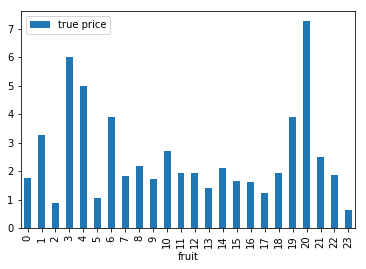

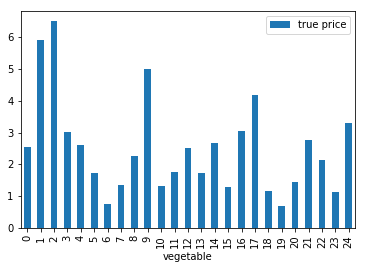

In [28]:
a2=a[['food','true price']]  
a2.plot(kind='bar')
plt.xlabel('fruit')
plt.show()
b4=b2[['food','true price']]  
b4.plot(kind='bar')
plt.xlabel('vegetable')
plt.show()

In [29]:
def sta(a):
    x=a['true price']
    d = {'Count':x.count(),'Min':x.min(),'Q1':x.quantile(.25),'Median':x.median(),'Q3':x.quantile(.75),
         'Mean':x.mean(),'Max':x.max(),'Var':x.var(),'Std':x.std(),'Skew':x.skew(),'Kurt':x.kurt()}
    return d

In [30]:
sta(a2)

{'Count': 24,
 'Kurt': 2.4047853657252865,
 'Max': 7.2664695821409335,
 'Mean': 2.5121362615458218,
 'Median': 1.9377791050793935,
 'Min': 0.6411769910065404,
 'Q1': 1.649107674764981,
 'Q3': 2.8350033259826004,
 'Skew': 1.635136295821394,
 'Std': 1.6338730893276188,
 'Var': 2.6695412720289768}

In [31]:
sta(b4)

{'Count': 25,
 'Kurt': 1.3273445331609555,
 'Max': 6.507216078769013,
 'Mean': 2.5146808807974934,
 'Median': 2.267963711334673,
 'Min': 0.695573809342462,
 'Q1': 1.3559757797202954,
 'Q3': 3.0183796421485254,
 'Skew': 1.280802173825395,
 'Std': 1.5147370936717115,
 'Var': 2.2944284629450231}

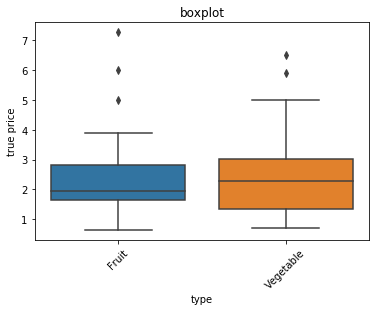

In [44]:
import seaborn as sns

ax = sns.boxplot(x = "type", y = "true price", data = ab)
ax.set(title = "boxplot", xlabel = "type", ylabel = "true price")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

Question 2 :  I create a new variable named true price, which is the value of price_per_lb / the value of yield. Considering that each per lb's price matching to different yield, the true price is actually what you pay per lb of food.
Through the plots and statistics, the distributions of prices are similar among fruits and vegetables. We can find that the mean prices of fruits and vegetables are so close(2.512 VS 2.514). When we compare the variances, the variance of vegetables(2.294) is larger than the variance of fruit(2.670), which means price of fruit fluctuates a lot.
Also, from the boxplot above, we can find that the price of fruit has 3 outliers, while price of vegetable are 2 outliers. The median, mean, quantile, max of vegetable are larger than those of fruit. The two distributions are so similar.

Question 3: To assess best value, we use the new variable named true price, which is the value of price_per_lb / the value of yield, as a evaluation criteria. Considering that each per lb's price matching to different yield, the true price is actually what you pay per lb of food. Accoring to plots, we can find that watermelon, cantaloup, bananas are the best value of price for fruit. And potatoes, cabbage are the best value of price for vegetables.

Question 4 : We used to regard fruits are more expensive than vegetables, but  we find the mean prices of fruits and vegetables are almost the same.(2.512 VS 2.514). They also have similar distributions. 

In [32]:
ab['true price'] = ab['price_per_lb']/ab['yield']

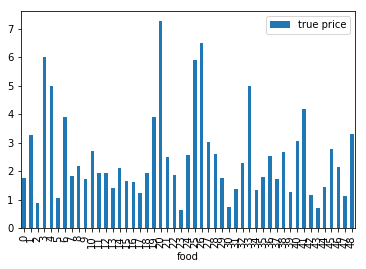

In [33]:
ab2=ab[['food','true price']]  
ab2.plot(kind='bar')
plt.xlabel('food')
plt.show()

Question 5: According to combination of price and yield, we can find pineapple, cantaloup and bananas have low true price and can provide good nutrition in fruit. Sweet potatoes, onino and lettuce have low ture price and can provide good nutrition in vegetables. If I have the evaluation of nutrition factor, I can use a scatter plot to find foods that have higher nutritional value, but lower adjusted price.I also can establish a factorial analysis model to find the relationship between the ture price and nutritional value. And I will find a better combination of price, yield and nutrition.